# Домашнее задание к Семинару 4
## (промежуточная аттестация)
### 1 задание
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [5]:
from google.colab import drive # подключаем GoogleDrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

1.1. Скачиваем *kc_house_data.csv* и загружаем данные из файла в Датафрейм

In [7]:
house = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv', encoding='utf-8', sep=",")
house.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Описание признаков (столбцов) таблицы из файла kc_house_data.csv
- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

1.2 Изучаем стоимость недвижимости
- Построим гистограмму для анализа стоимости недвижимости


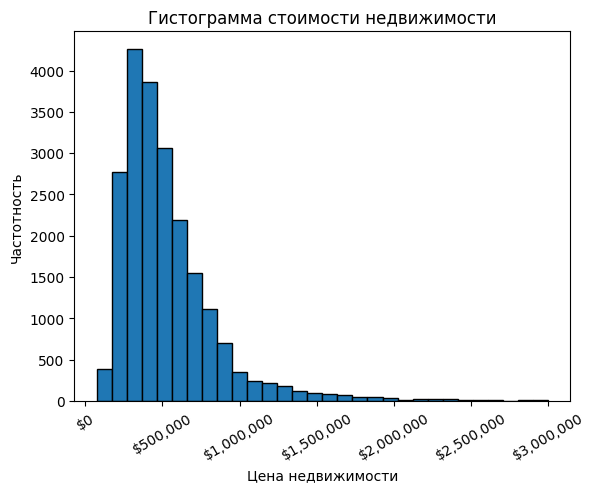

In [11]:
plt.hist((house[house['price'] <= 3000000])['price'], bins=30, edgecolor='black') # ограниченный диапазон цен
plt.xlabel('Цена недвижимости')
plt.ylabel('Частотность')
plt.title('Гистограмма стоимости недвижимости')
plt.xticks(rotation=30)
formatter = ticker.StrMethodFormatter("${x:,.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

Вывод: по данной гистограмме мы поможет понять распределение цен на недвижимость и увидеть, какие диапазоны цен преобладают.

1.3 Изучим распределение квадратуры жил.площади.
- для анализа построим гистограмму

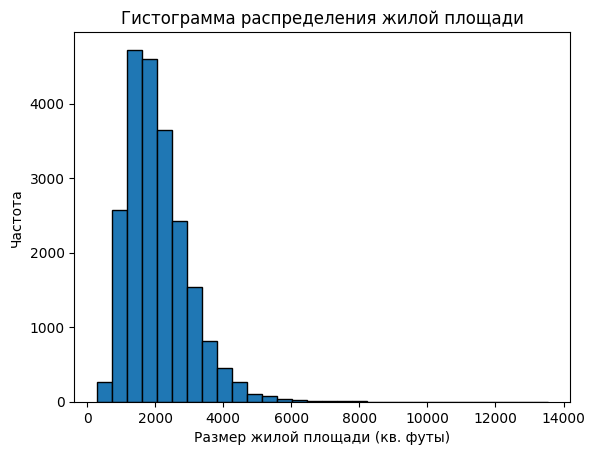

In [12]:
plt.hist(house['sqft_living'], bins=30, edgecolor='black')
plt.xlabel('Размер жилой площади (кв. футы)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения жилой площади')
plt.show()

Выводы: по данной гистограмме мы поможет понять распределение недвижимости по размеру жилой площади и увидеть, какие предложения преобладают.

1.4: Изучим распределение года постройки.

- Построим гистограмму для года постройки

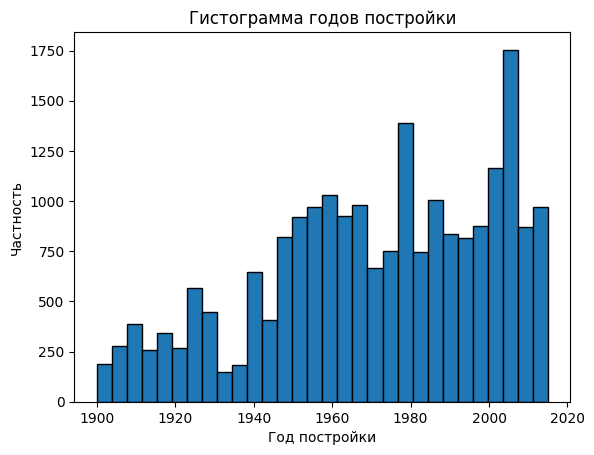

In [13]:
plt.hist(house['yr_built'], bins=30, edgecolor='black')
plt.xlabel('Год постройки')
plt.ylabel('Частность')
plt.title('Гистограмма годов постройки')
plt.show()

Вывод: по данной гистограмме мы можем выявить каких годов строительства дома преобладают на рынке.

### Задание 2
2.1 Изучите распределение домов от наличия вида на набережную.


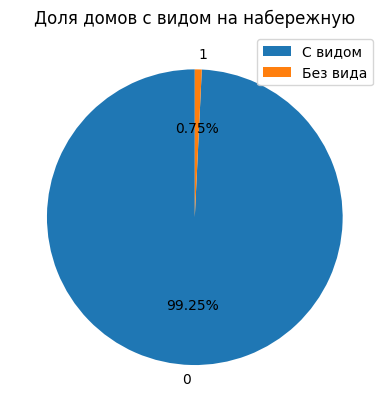

In [14]:
waterfront_counts = house['waterfront'].value_counts()

plt.pie(waterfront_counts, labels=waterfront_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Доля домов с видом на набережную')
plt.legend(labels=['С видом', 'Без вида'], loc='upper right')

Вывод: С помощью этой диаграммы мы сравниваем количество домов с видом на набережную и без него, это нам дает понимание о доле на рынке тех или иных объектов.

2.2: Изучим распределение этажей домов.


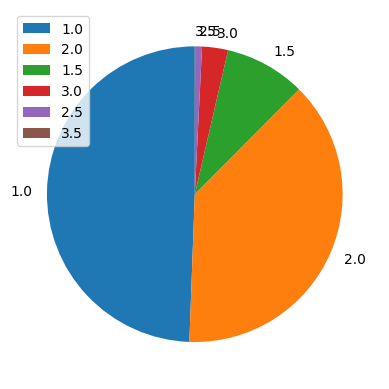

In [15]:
floors_counts = house['floors'].value_counts()
# Создаем пироговую диаграмму
plt.pie(floors_counts, labels=floors_counts.index, startangle=90)

# Добавляем легенду
plt.legend(title='Количество этажей', labels=floors_counts.index, loc='upper right')

plt.legend()

На графике наглядно видно соотношение количества недвижимости в зависимости от этажности

2.3. Изучим распределение состояния домов

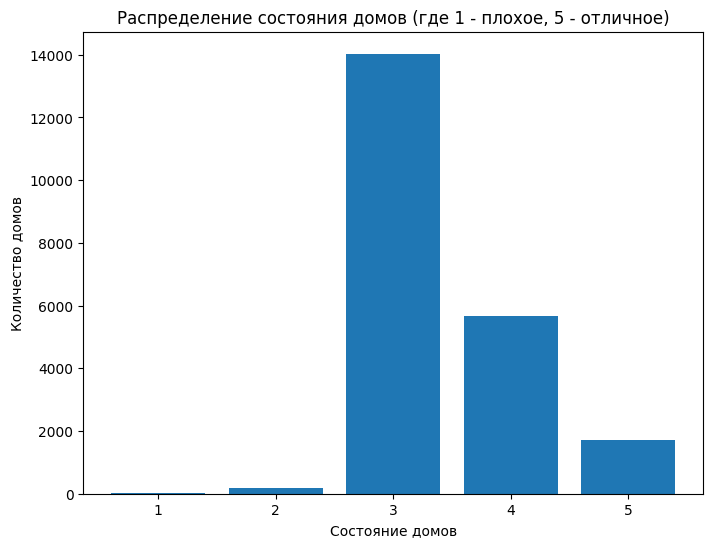

In [16]:
# Группируем данные по состоянию домов и подсчитываем количество домов в каждой категории
condition_counts = house['condition'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(condition_counts.index, condition_counts.values)

plt.xlabel('Состояние домов')
plt.ylabel('Количество домов')
plt.title('Распределение состояния домов (где 1 - плохое, 5 - отличное)');

На графике наглядно видно соотношение по количеству недвижимости в зависимости от состояния домов

# Задание 3
3.1. Исследовать, какие характеристики недвижимости влияют на её стоимость, используя не менее 5 различных диаграмм

Для исследования характеристик недвижимости влияющих на её стоимость, будем использовать

- Диаграмму рассеяния (Зависимость цены от площади дома)
- Гистограмму (histogram)
- Ящик с усами (box plot)
- Корреляционную матрицу (heatmap)
- Круговую диаграмму (pie chart)

Это позволит нам визуализировать зависимости между различными параметрами и ценой недвижимости.

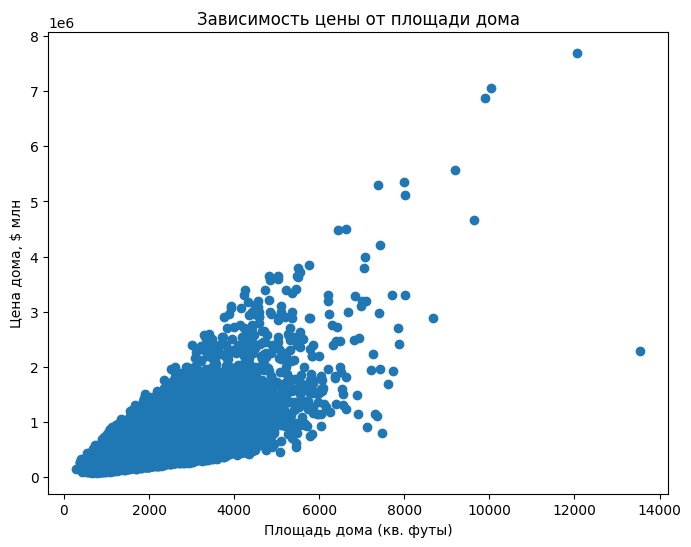

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(house['sqft_living'], house['price'])
plt.xlabel('Площадь дома (кв. футы)')
plt.ylabel('Цена дома, $ млн')
plt.title('Зависимость цены от площади дома');

Вывод: мы видим есть ли корреляция между жилой площади и ценой недвижимости. Точки на графике идут вверх, то есть положительная корреляция и мы понимаем, что стоимость домов напрамую зависит (коррелирует) от площади.

### Strip plot (полосчатая диаграмма)

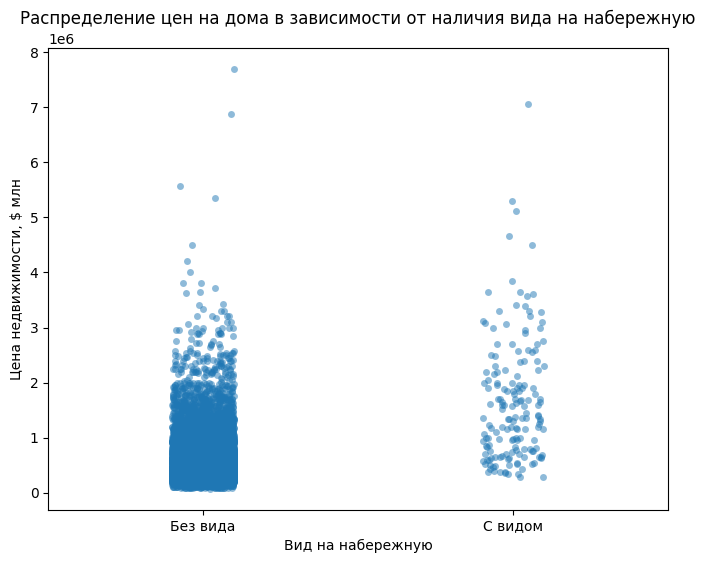

In [18]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='waterfront', y='price', data=house, jitter=True, alpha=0.5)
plt.xlabel('Вид на набережную')
plt.ylabel('Цена недвижимости, $ млн')
plt.title('Распределение цен на дома в зависимости от наличия вида на набережную')
plt.xticks([0, 1], ['Без вида', 'С видом']);


Если на этой диаграмме мы можем сделать вывод только то, что больше всего предложений в низкой ценовой категории квартир без вида на набережную, то на графике ниже (скрипичный график) мы явно увидим нахождение медианы и квантилей цен на недвижимость и плотность предложений (совершенных сделок)...

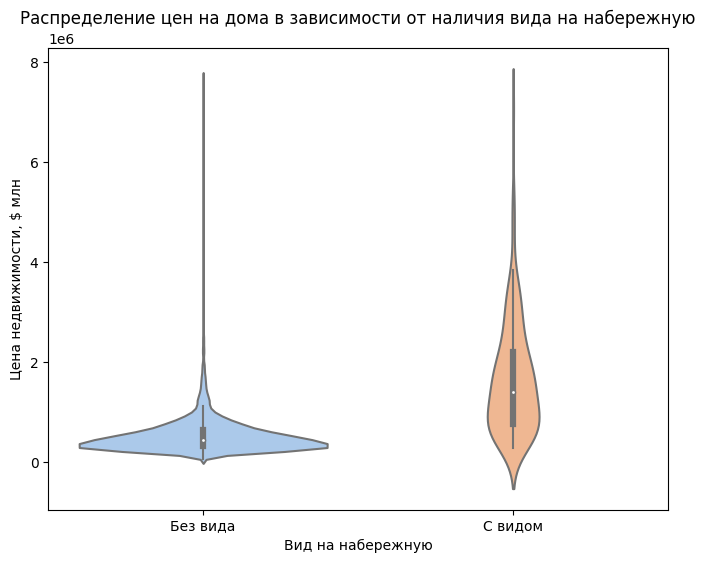

In [19]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='waterfront', y='price', data=house, palette='pastel')
plt.xlabel('Вид на набережную')
plt.ylabel('Цена недвижимости, $ млн')
plt.title('Распределение цен на дома в зависимости от наличия вида на набережную')
plt.xticks([0, 1], ['Без вида', 'С видом']);

Проведем анализ влияния Вида (View) на стоимость недвижимости



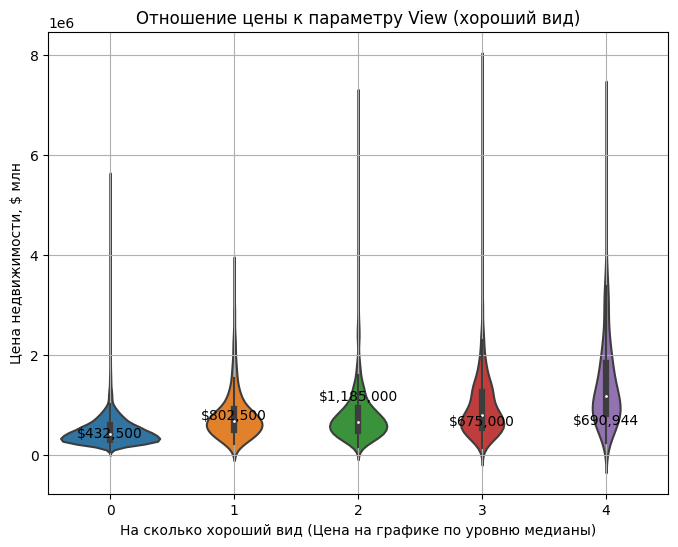

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='view', y='price', data=house)
plt.xlabel('На сколько хороший вид (Цена на графике по уровню медианы)')
plt.ylabel('Цена недвижимости, $ млн')
plt.title('Отношение цены к параметру View (хороший вид)')
plt.xticks(range(0, 5))
plt.grid(True)
# Форматирование меток на оси y для каждого значения ящика (параметра view)
for i, box in enumerate(house['view'].unique()):
    price_data = house[house['view'] == box]['price']
    formatter = ticker.StrMethodFormatter("${x:,.0f}")
    plt.gca().text(i, price_data.median(), formatter(price_data.median()), ha='center', va='center')

Вывод: С помощью этого грфика мы наглядно видем распределение цен и предложений в каждой категории параметра "Вид"

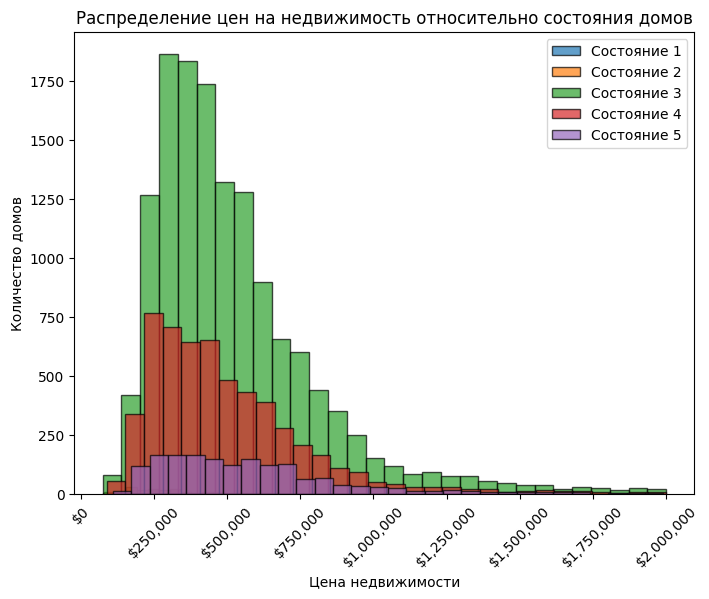

In [27]:
plt.figure(figsize=(8, 6))
# Ограничиваем ценовой диапазон до 2 000 000
price_limit = 2000000
filtered_house = house[house['price'] <= price_limit]

# Выбираем уникальные значения состояния домов
conditions = sorted(filtered_house['condition'].unique())

# Создаем подграфики для каждого состояния домов
for condition in conditions:
    data = filtered_house[filtered_house['condition'] == condition]['price']
    plt.hist(data, bins=30, alpha=0.7, label=f'Состояние {condition}', edgecolor='black')

plt.xlabel('Цена недвижимости')
plt.ylabel('Количество домов')
plt.title('Распределение цен на недвижимость относительно состояния домов')
plt.xticks(rotation=45)

# Форматирование меток на оси x в денежный формат (например, €100000)
formatter = ticker.StrMethodFormatter("${x:,.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.legend();

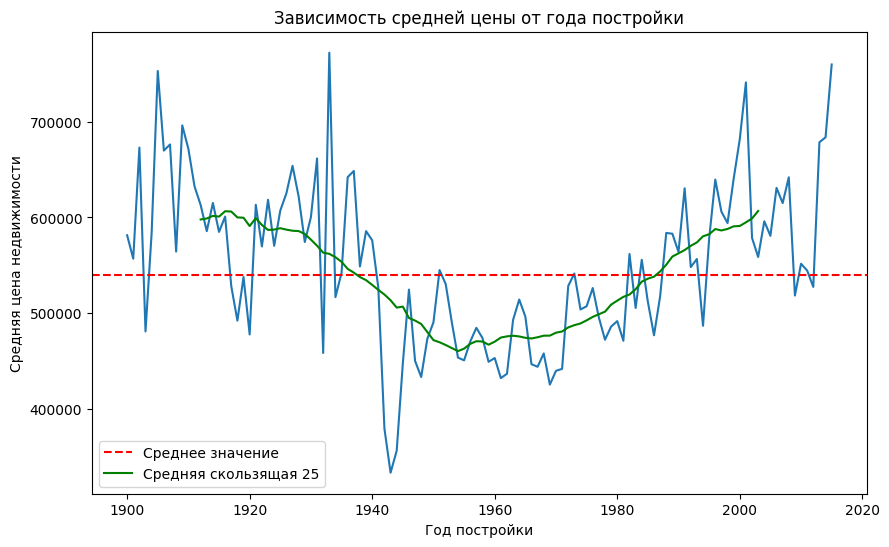

In [28]:
mean_price_by_year = house.groupby('yr_built')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year.index, mean_price_by_year.values)
plt.xlabel('Год постройки')
plt.ylabel('Средняя цена недвижимости')
plt.title('Зависимость средней цены от года постройки')

# Вычисляем среднее значение цены по всем годам
mean_price_overall = house['price'].mean()

# Добавляем среднюю горизонтальную линию на графике
plt.axhline(mean_price_overall, color='red', linestyle='--', label='Среднее значение')

# Вычисляем среднюю скользящую со смещением 25 (можно изменить значение)
rolling_mean = mean_price_by_year.rolling(window=25, center=True).mean()

# Добавляем среднюю скользящую на графике
plt.plot(mean_price_by_year.index, rolling_mean, color='green', label='Средняя скользящая 25')

plt.legend()

<ipython-input-30-f648e13fd625>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house['price_per_sqft'] = filtered_house['price'] / filtered_house['sqft_living']


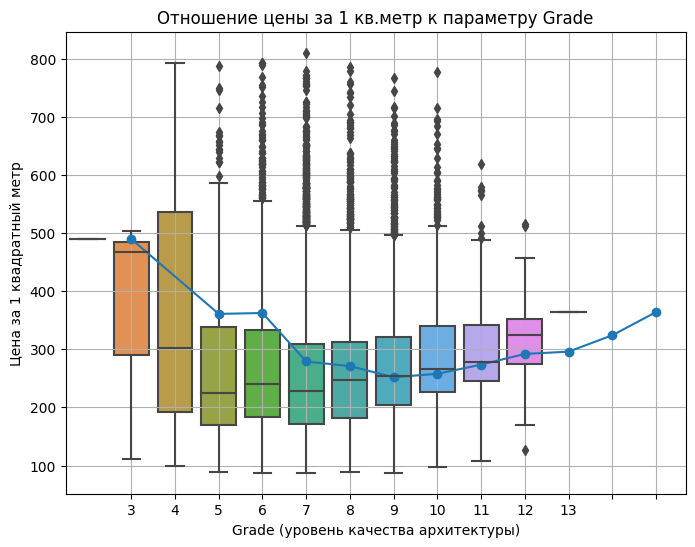

In [30]:
plt.figure(figsize=(8, 6))
# Ограничиваем ценовой диапазон до 2 000 000
'''filtered_house = house[house['price'] <= 2000000] '''

# Рассчитываем цену за 1 квадратный метр
filtered_house['price_per_sqft'] = filtered_house['price'] / filtered_house['sqft_living']

sns.boxplot(x='grade', y='price_per_sqft', data=filtered_house)

# Line plot с группировкой по grade и усреднением значений
mean_price_per_grade = filtered_house.groupby('grade')['price_per_sqft'].mean()
plt.plot(mean_price_per_grade.index, mean_price_per_grade.values, marker='o')
# Scatter plot
#plt.scatter(filtered_house['grade'], filtered_house['price_per_sqft'], alpha=0.5, edgecolors='black')

plt.xlabel('Grade (уровень качества архитектуры)')
plt.ylabel('Цена за 1 квадратный метр')
plt.title('Отношение цены за 1 кв.метр к параметру Grade')
plt.xticks(range(1, 14))
plt.grid(True);